#**Introduction**
The majority of Companies finalize laptops price on various factors such as Company name, Type, Inches, CPU/performance , Storage ,etc.What should be actal prices of laptop that an individual buy's. However the price of these laptops are dependent on various factors such as company name, Screen resoultion , Memory required ,etc. We will use the the important factors among these and predict and analyze the products of various comapanies. This application/model will give in depth khowledge of laptop prices.

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import RandomizedSearchCV


In [ ]:



df=pd.read_csv('laptop.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# I am creating multiple copies of data to not disturb the original dataset and use them as and when required.
df1=df.copy()
df1.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 13)

As we can see that their are 1303 rows wih 13 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In the above data we can see that their are Unnamed: 0.1,Unnamed: 0 non-required columns, we should drop these

In [ ]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [ ]:
df.describe(include='all')

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273.000000
unique,19,6,25,40,118,10,40,110,9,189,NaN
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,290,710,640,495,183,601,401,271,1047,111,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59955.814073
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37332.251005
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161.120000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79333.387200


In [ ]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
df.isnull().mean()*100

Company             2.302379
TypeName            2.302379
Inches              2.302379
ScreenResolution    2.302379
Cpu                 2.302379
Ram                 2.302379
Memory              2.302379
Gpu                 2.302379
OpSys               2.302379
Weight              2.302379
Price               2.302379
dtype: float64

In [ ]:
import missingno as msno # library to examine missing values

<Axes: >

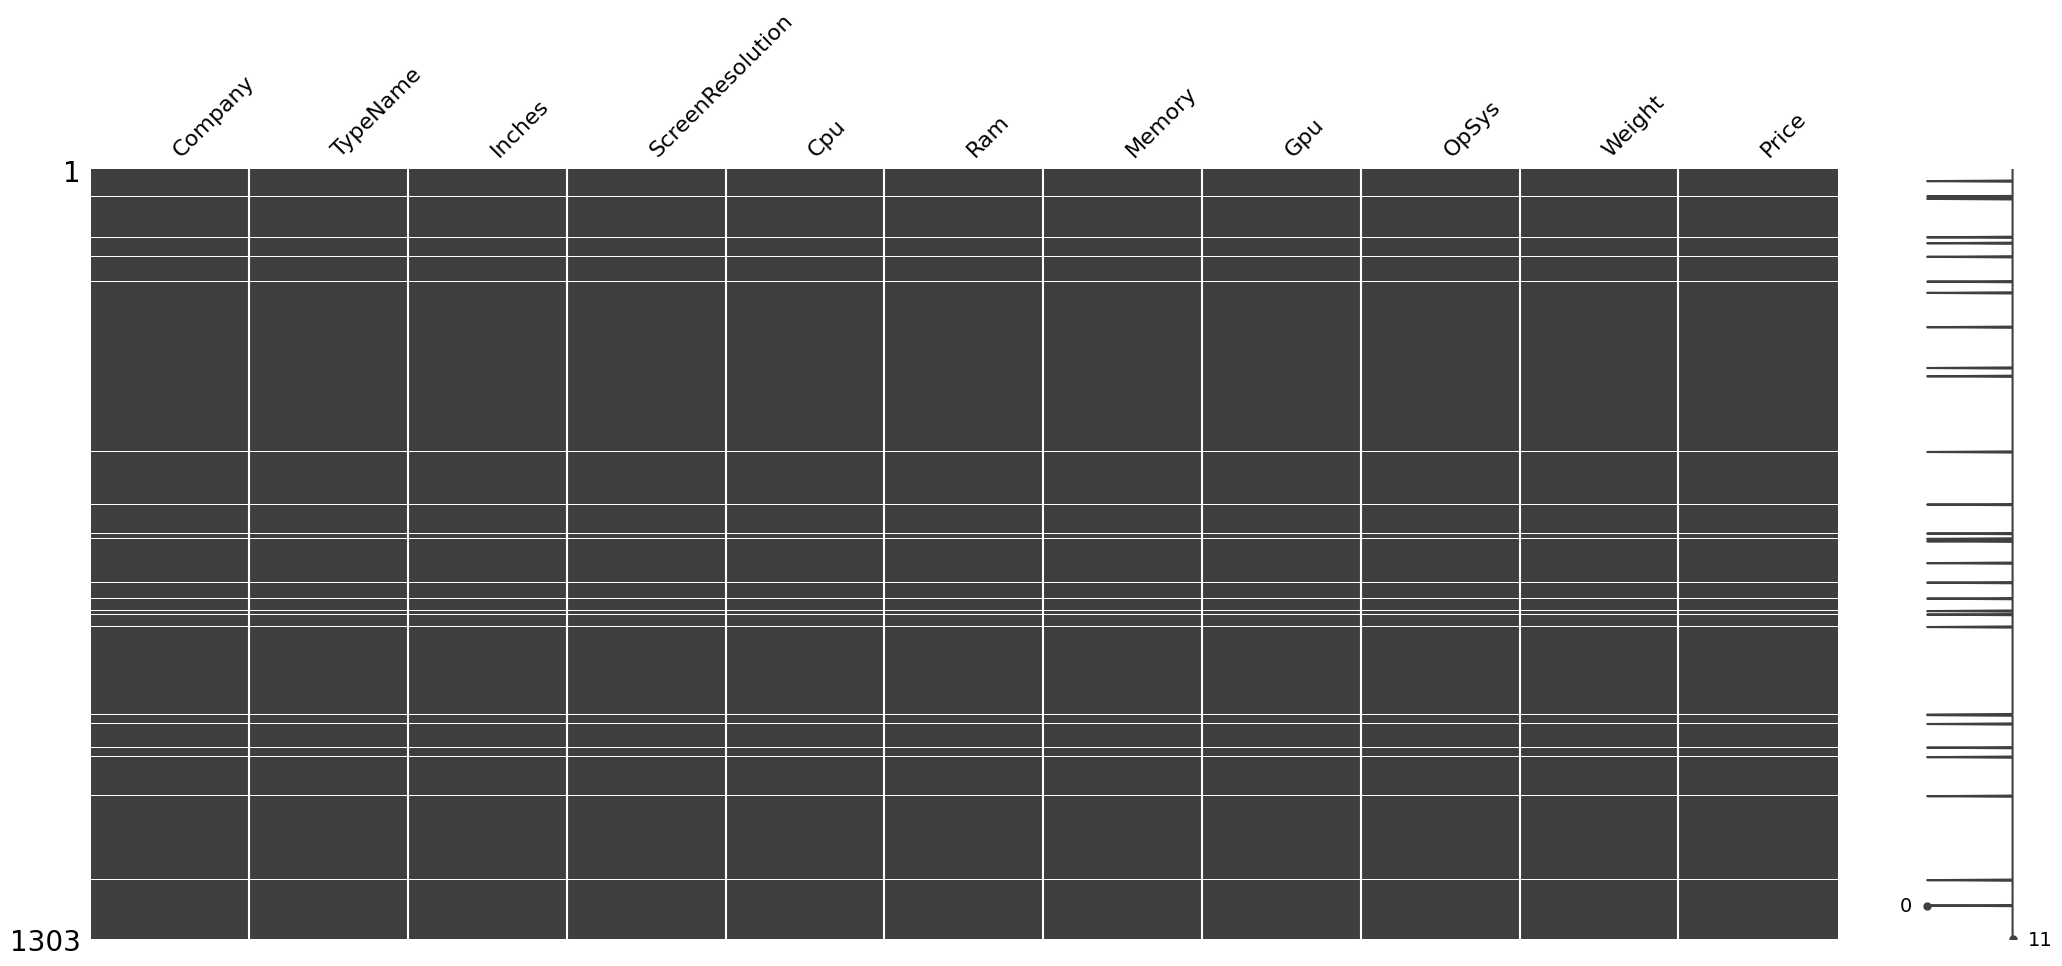

In [ ]:
# creating matrix plot to see the pattern in missing values
msno.matrix(df)

<Axes: >

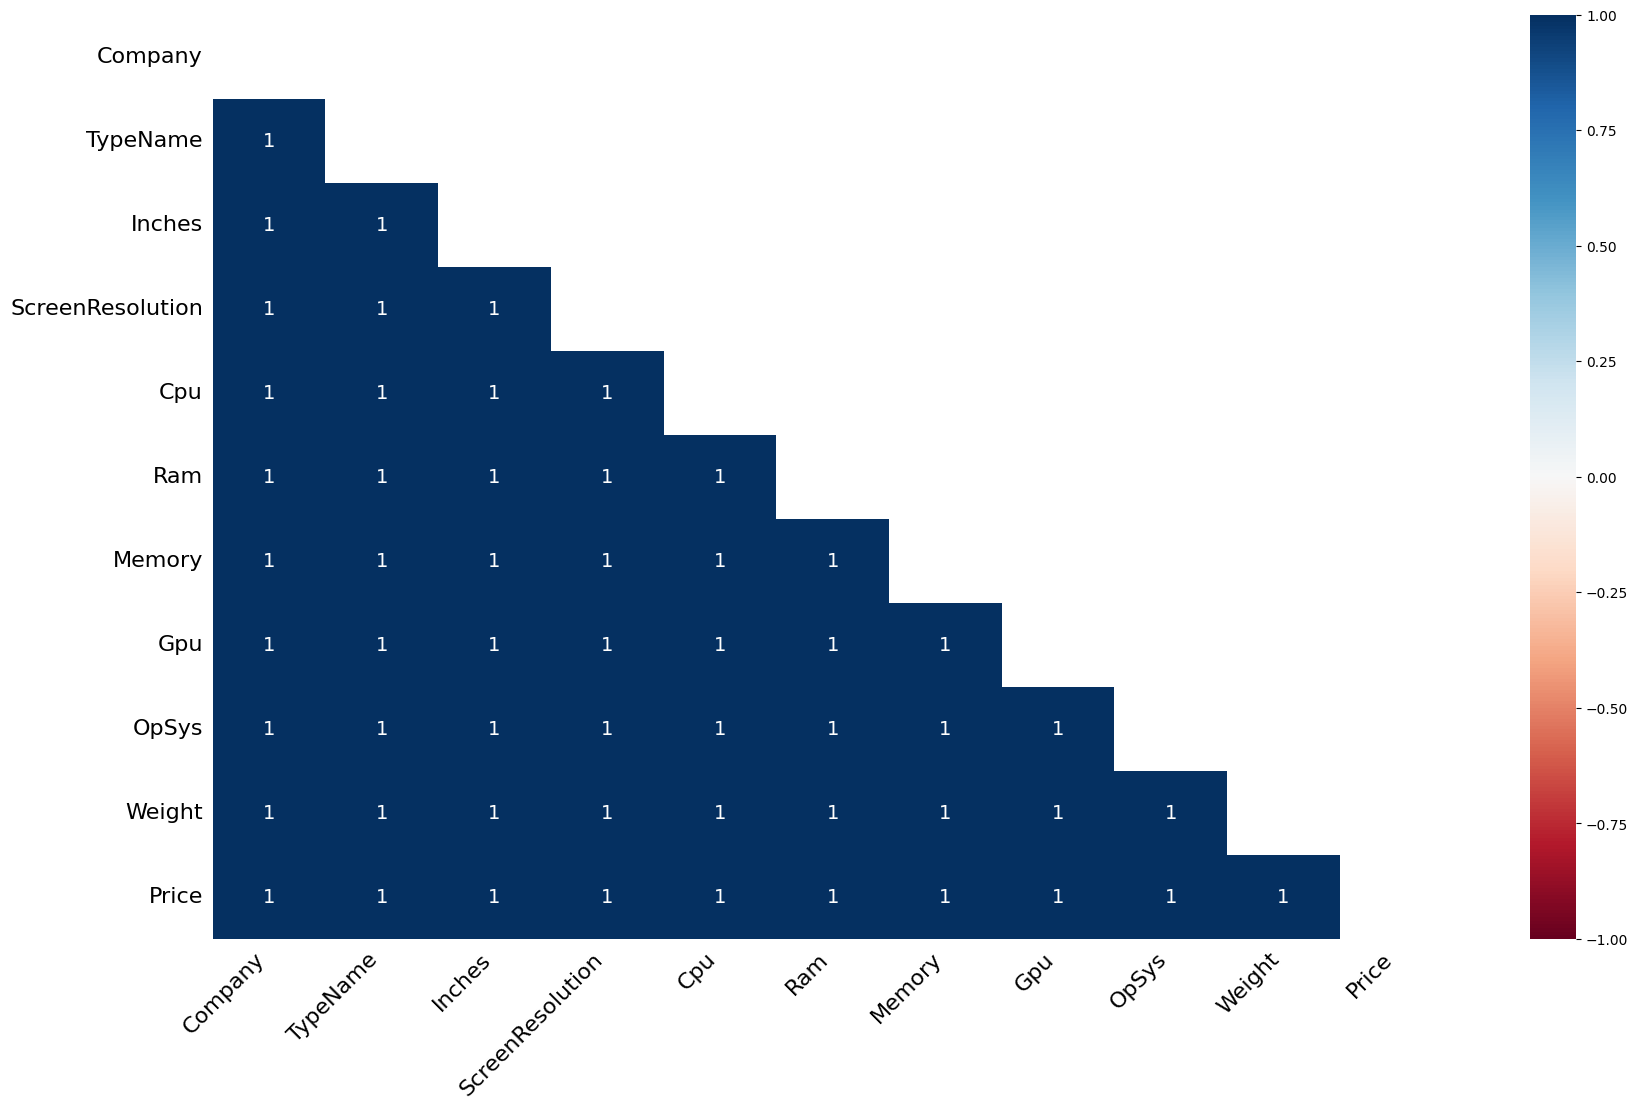

In [ ]:
msno.heatmap(df)

##Lets Convert categorical columns into binary first

In [ ]:
df['Inches'].value_counts()

Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [ ]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [ ]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
df['TypeName'].value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

In [ ]:
df['Cpu'].value_counts()
df['Ram'].value_counts()
len(df['Memory'].value_counts())

40

In [ ]:
df_encod=df.copy(deep=True)

#Apply encoding before imputing missing values.

In [ ]:
# df_encod=pd.get_dummies(df,columns=['Company','TypeName','OpSys'])

df_encod['Weight']=df['Weight'].str.replace("kg","")
df_encod['Weight'] = pd.to_numeric(df_encod['Weight'], errors='coerce')
df_encod['Ram']=df['Ram'].str.replace("GB","")
df_encod['Ram']=pd.to_numeric(df_encod['Ram'], errors='coerce')
#df_encod.drop(columns=['ScreenResolution','Cpu','Memory','Gpu'],inplace=True)

#Since their are 110 unique values in ScreenResolution we will use label encoding

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df_encod['ScreenResolution']=encoder.fit_transform(df['ScreenResolution'])
df_encod['ScreenResolution']=pd.to_numeric(df_encod['ScreenResolution'], errors='coerce')
df_encod['Memory']=encoder.fit_transform(df['Memory'])
df_encod['Memory']=pd.to_numeric(df_encod['Memory'], errors='coerce')
df_encod['Cpu']=encoder.fit_transform(df['Cpu'])
df_encod['Cpu']=pd.to_numeric(df_encod['Cpu'], errors='coerce')
df_encod['Gpu']=encoder.fit_transform(df['Gpu'])
df_encod['Gpu']=pd.to_numeric(df_encod['Gpu'], errors='coerce')
df_encod['Company']=encoder.fit_transform(df['Company'])
df_encod['Company']=pd.to_numeric(df_encod['Company'], errors='coerce')
df_encod['TypeName']=encoder.fit_transform(df['TypeName'])
df_encod['TypeName']=pd.to_numeric(df_encod['TypeName'], errors='coerce')
df_encod['OpSys']=encoder.fit_transform(df['OpSys'])
df_encod['OpSys']=pd.to_numeric(df_encod['OpSys'], errors='coerce')
df_encod.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8.0,4,58,8,1.37,71378.6832
1,1,4,13.3,1,63,8.0,2,51,8,1.34,47895.5232
2,7,3,15.6,8,74,8.0,16,53,4,1.86,30636.0000
3,1,4,15.4,25,85,16.0,29,9,8,1.83,135195.3360
4,1,4,13.3,23,67,8.0,16,59,8,1.37,96095.8080


In [ ]:
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int64  
 1   TypeName          1303 non-null   int64  
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1303 non-null   int64  
 4   Cpu               1303 non-null   int64  
 5   Ram               1273 non-null   float64
 6   Memory            1303 non-null   int64  
 7   Gpu               1303 non-null   int64  
 8   OpSys             1303 non-null   int64  
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 112.1+ KB


In [ ]:
non_numeric_columns = df_encod.select_dtypes(include=['object']).columns
# Replace '?' with NaN in non-numeric columns
df_encod[non_numeric_columns] = df_encod[non_numeric_columns].replace('?', np.nan)

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=ccaf5175b82c7085cef68b3aa9a5566e4fc51aa4202586f508b2b1e062f50b5f
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=99e13b99d5e2a538e38cf6533dfd62b3b9ae61004b4cedc2c46beb9ba6819ca8
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer
MICE_imputer=IterativeImputer()
data_MICE=df_encod.copy(deep=True)
data_MICE.iloc[:,:]= MICE_imputer.fit_transform(data_MICE)

In [ ]:
data_MICE.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

##Data Vizualization

<ipython-input-27-006b12abbe35>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Company', palette=colors)
<ipython-input-27-006b12abbe35>:8: UserWarning: The palette list has more values (20) than needed (19), which may not be intended.
  sns.countplot(data=df, x='Company', palette=colors)


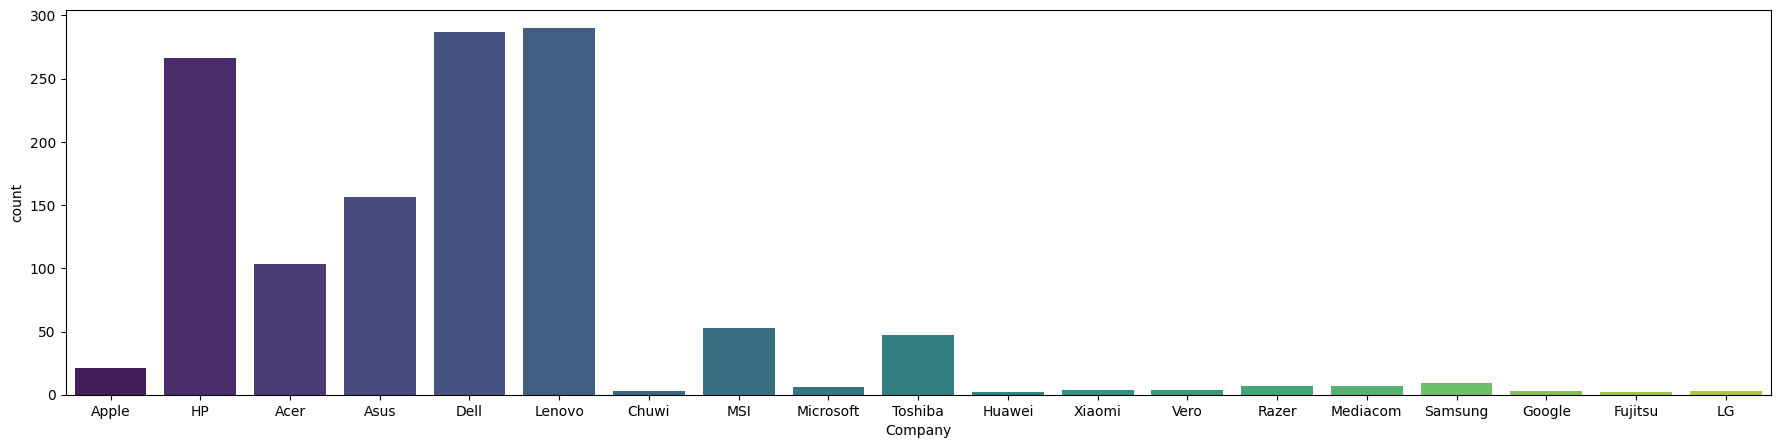

In [ ]:
# Set the size of the figure
plt.figure(figsize=(22, 5))

# Create a color palette for each unique 'Company'
colors = sns.color_palette("viridis", len(df['Company'].unique()))

# Create a count plot with the specified colors
sns.countplot(data=df, x='Company', palette=colors)

# Show the plot
plt.show()

From above raph we can conclude that , HP,Acer,Asus,Dell,Lenovo and MSI
are some o te dominant or monopolistic companies with more number of sales.

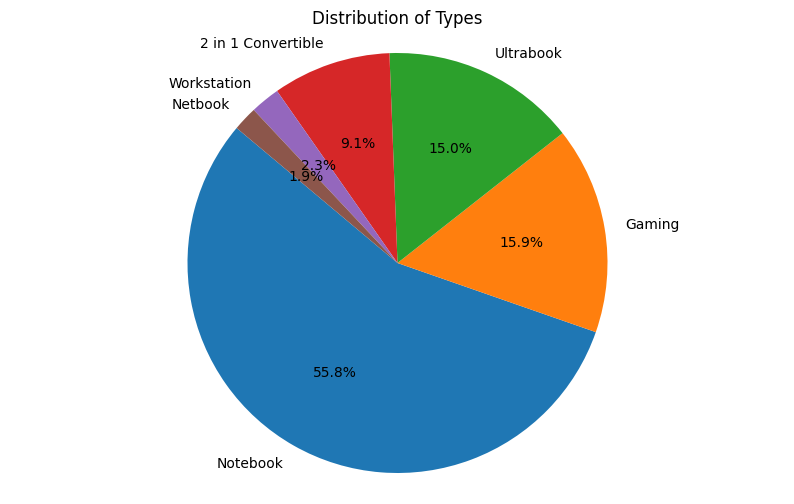

In [ ]:
type_counts = df['TypeName'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Types')
plt.show()

##Here we can see that Notebook is most sold category in types , ater that the second best is Gaming and Ultrabook, but numbers show that it is more profitable to keep Notebook type as it is dominant

#Categorical-Numerical

<Axes: xlabel='Company', ylabel='Price'>

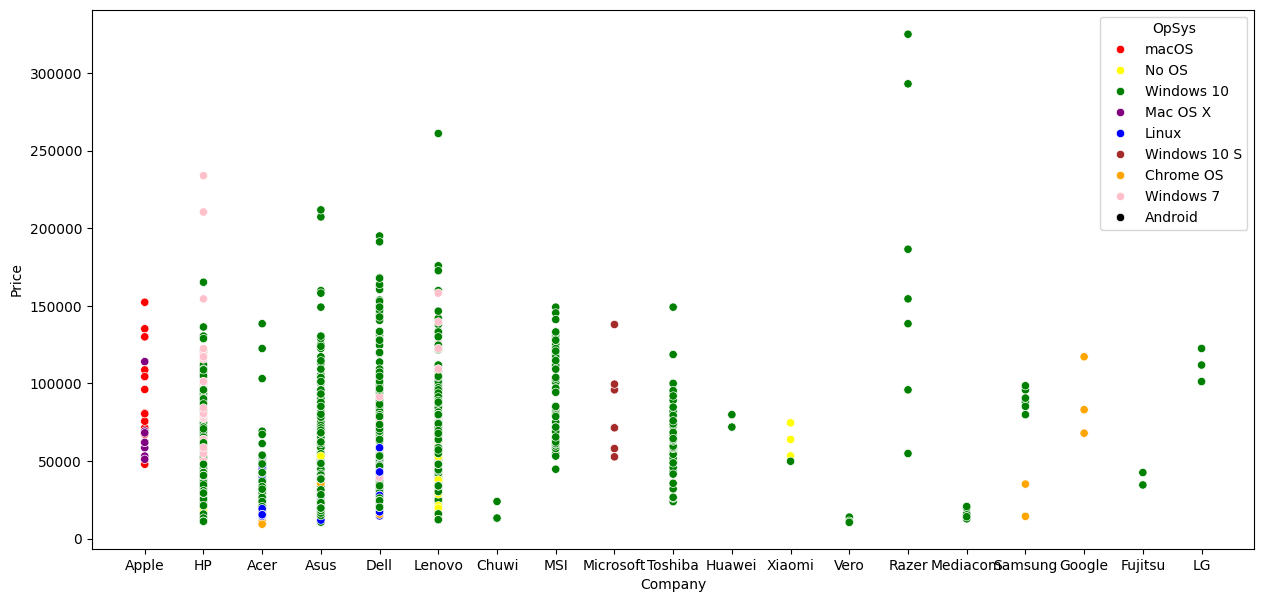

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['Company'],y=df['Price'],hue=df['OpSys'],palette=['red','yellow','green','purple','blue','brown','orange','pink','black'])

##Windows 10 is most used OS worldwide ,so laptops with Windows OS is better as per sales record

<Axes: xlabel='Company', ylabel='Price'>

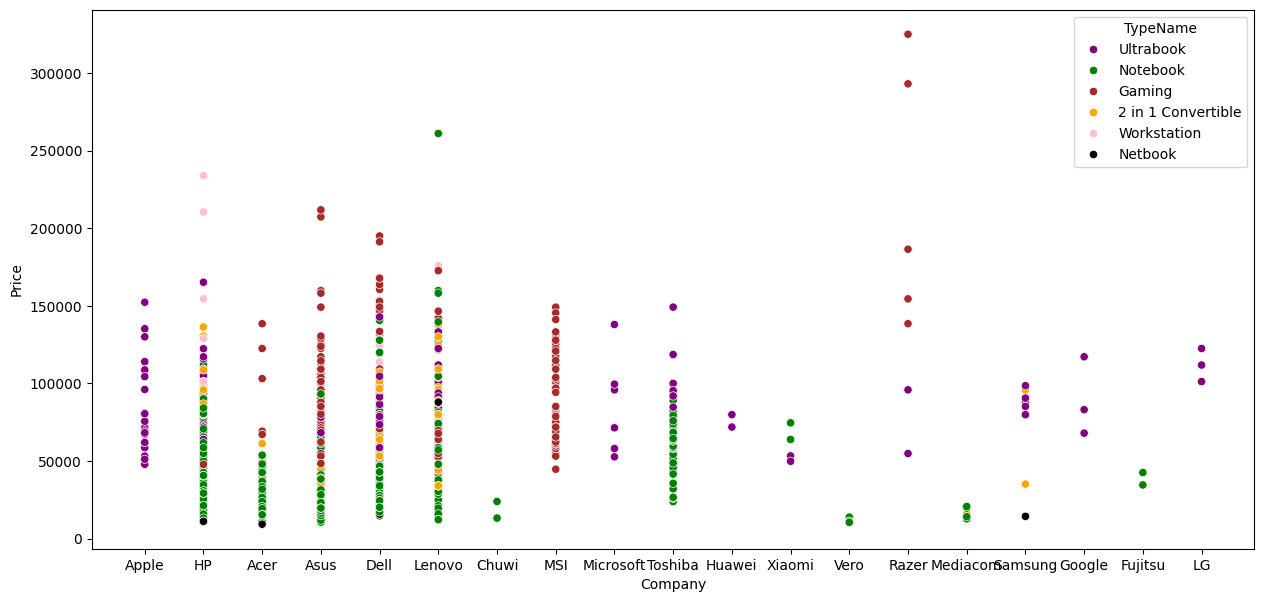

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['Company'],y=df['Price'],hue=df['TypeName'],palette=['purple','green','brown','orange','pink','black'])

<ipython-input-31-ff64b6e95e09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Ram',y='Price',palette=['Red','Green','Blue','Purple','Yellow','white','Orange','Pink','Black','Red'])


<Axes: xlabel='Ram', ylabel='Price'>

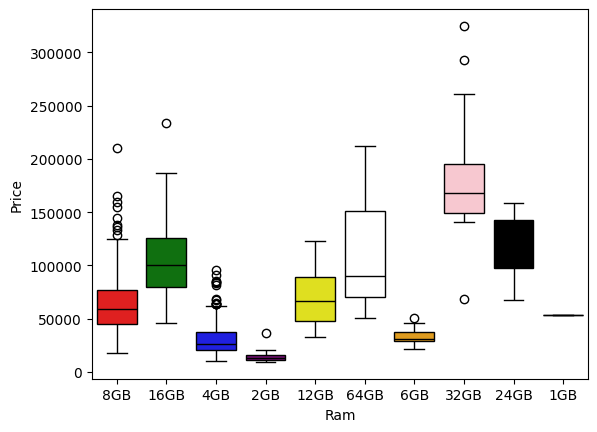

In [ ]:
sns.boxplot(data=df,x='Ram',y='Price',palette=['Red','Green','Blue','Purple','Yellow','white','Orange','Pink','Black','Red'])

##Ram is integral part in laptops, so it is vital to see Ram of which memory is being used most and how much is its costing. The most expensive but less used is 32GB. And the most used is 64GB

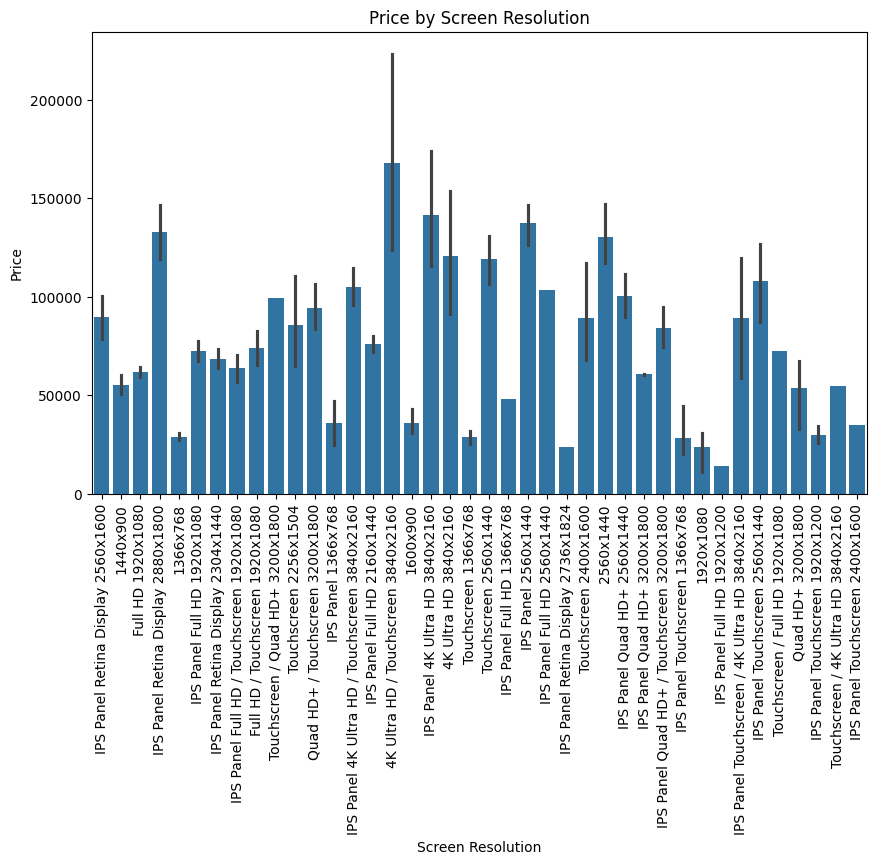

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ScreenResolution', y='Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Screen Resolution')
plt.ylabel('Price')
plt.title('Price by Screen Resolution')
plt.show()

<Axes: ylabel='Price'>

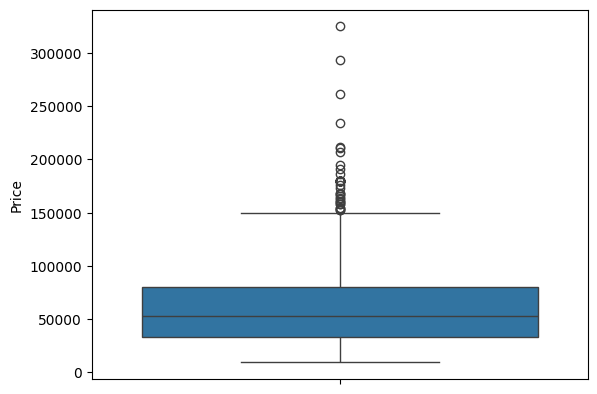

In [ ]:
sns.boxplot(data=data_MICE['Price'])

<Axes: ylabel='Price'>

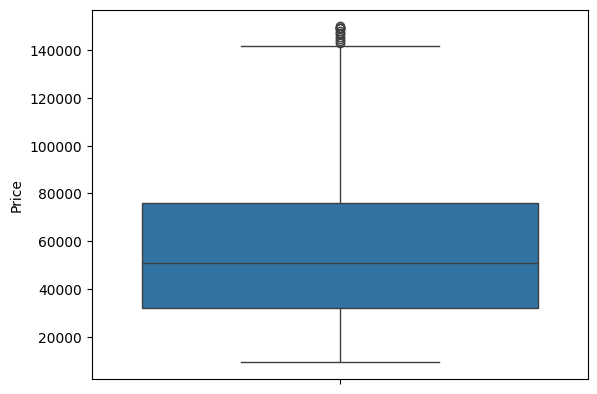

In [ ]:
# Dealing with outliers using IQR method
Q1 = data_MICE['Price'].quantile(0.25)
Q3 = data_MICE['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
data_MICE = data_MICE[(data_MICE['Price'] < upper_bound) & (data_MICE['Price'] > lower_bound)]
sns.boxplot(data_MICE['Price'])

<Axes: >

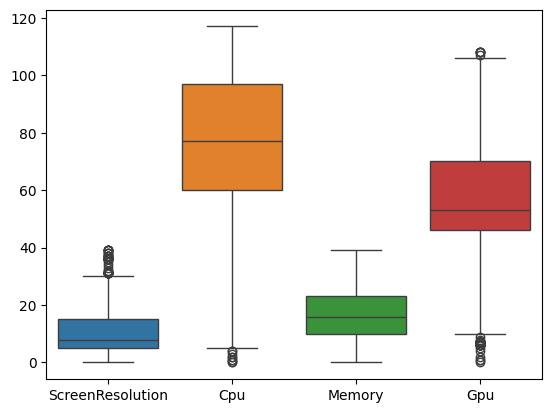

In [ ]:
sns.boxplot(data=data_MICE[['ScreenResolution','Cpu','Memory','Gpu']])

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

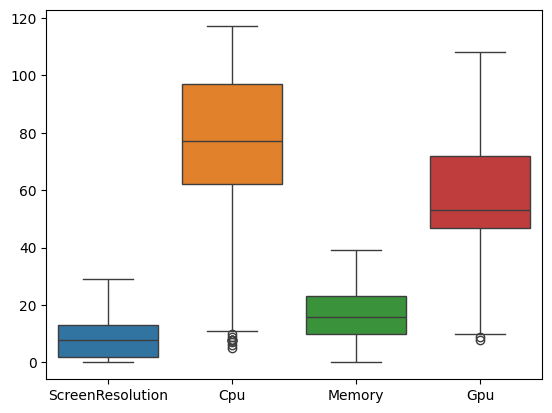

In [ ]:
# Dealing with outliers using IQR method
Q1 = data_MICE['ScreenResolution'].quantile(0.25)
Q3 = data_MICE['ScreenResolution'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
data_MICE = data_MICE[(data_MICE['ScreenResolution'] < upper_bound) & (data_MICE['ScreenResolution'] > lower_bound)]

# Dealing with outliers using IQR method
Q1 = data_MICE['Cpu'].quantile(0.25)
Q3 = data_MICE['Cpu'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
data_MICE = data_MICE[(data_MICE['Cpu'] < upper_bound) & (data_MICE['Cpu'] > lower_bound)]

# Dealing with outliers using IQR method
Q1 = data_MICE['Gpu'].quantile(0.25)
Q3 = data_MICE['Gpu'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
data_MICE = data_MICE[(data_MICE['Gpu'] < upper_bound) & (data_MICE['Gpu'] > lower_bound)]

sns.boxplot(data=data_MICE[['ScreenResolution','Cpu','Memory','Gpu']])
data_MICE.isnull().sum()

We have handled outliers pretty well, we shall focus more on cpu since we can see some outliers present

In [ ]:
data_MICE['z_score']=(data_MICE.Cpu - data_MICE.Cpu.mean())/data_MICE.Cpu.std(ddof=0)
data_MICE['z_score'].unique()

array([-4.97912783e-01, -5.81381801e-01, -1.22302198e-01,  3.36777404e-01,
       -4.14443764e-01, -2.62637276e+00,  2.95042895e-01,  1.21320210e+00,
        2.53308386e-01, -8.73523367e-01,  3.78511914e-01, -1.08219591e+00,
        8.37591516e-01, -7.48319839e-01,  2.90132953e-03, -2.29249668e+00,
       -6.23116311e-01,  1.25493661e+00, -2.00035512e+00, -2.37596570e+00,
       -1.66647904e+00, -7.06585329e-01,  1.04626406e+00, -5.39647292e-01,
       -2.12555865e+00,  1.50534367e+00, -2.87677981e+00, -1.70821355e+00,
       -6.64850820e-01, -2.20902767e+00, -2.54290374e+00, -3.72709255e-01,
       -1.24913395e+00,  1.28104858e-01, -9.15257876e-01, -2.83504531e+00,
        7.54122498e-01,  1.69839367e-01,  5.03715442e-01, -2.41770021e+00,
       -2.79331080e+00, -4.56178273e-01, -9.56992385e-01, -1.87515159e+00,
        9.21060535e-01, -2.75157629e+00, -1.83341708e+00,  1.46360916e+00,
        4.46358389e-02, -1.49954101e+00, -1.74994806e+00,  7.12387988e-01,
        1.12973308e+00,  

In [ ]:
#usually we will consider anything more than 3SD as an outlier.
data_MICE[(data_MICE['z_score']>1.8)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,z_score


In [ ]:
# Dealing with outliers using IQR method
Q1 = data_MICE['Cpu'].quantile(0.25)
Q3 = data_MICE['Cpu'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
data_MICE = data_MICE[(data_MICE['Cpu'] < upper_bound) & (data_MICE['Cpu'] > lower_bound)]

<Axes: >

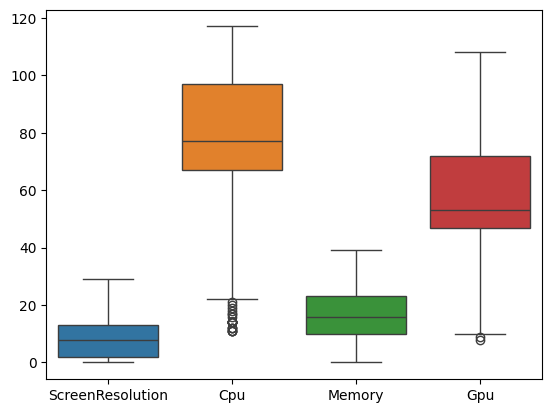

In [ ]:
sns.boxplot(data=data_MICE[['ScreenResolution','Cpu','Memory','Gpu']])

In [ ]:
data_MICE.drop(columns='z_score',inplace=True)

#Model Building


#Lets seperate dependent and independent variables

In [ ]:
X=data_MICE.drop(columns=['Price'])
y=data_MICE['Price']
X.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,4,13.3,23,65,8.0,4,58,8,1.37
1,1,4,13.3,1,63,8.0,2,51,8,1.34
2,7,3,15.6,8,74,8.0,16,53,4,1.86
3,1,4,15.4,25,85,16.0,29,9,8,1.83
4,1,4,13.3,23,67,8.0,16,59,8,1.37


In [ ]:
y.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [ ]:
X.shape

(1112, 10)

#Feature selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(estimator=DecisionTreeRegressor(random_state=0), n_features_to_select=15) # taking only 15 features
rfe = rfe.fit(X, y)
print(X.columns)
print(rfe.support_)
rfe.ranking_

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

*italicized text*#All columns are important


In [ ]:
X.shape

(1112, 10)

In [ ]:
# performing cross validation technique for that using train_test_split to split X and y
from sklearn.model_selection import train_test_split

In [ ]:
# this is called hold out cross validation technique
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 0.84152367,  0.34129819,  0.23950311, ..., -0.79315694,
        -0.7962686 ,  0.17576415],
       [-0.34860446,  0.34129819,  0.23950311, ..., -0.25242341,
         0.18553831,  0.17576415],
       [ 1.0795493 , -1.28996037,  1.10626993, ...,  0.93719035,
         0.18553831,  0.81873955],
       ...,
       [ 0.84152367,  0.34129819,  0.23950311, ..., -0.79315694,
        -0.7962686 , -0.21002109],
       [ 2.26967743,  0.34129819,  0.23950311, ..., -0.25242341,
         0.18553831, -0.08142601],
       [-0.58663009,  0.34129819, -0.57627742, ..., -0.57686353,
         0.18553831, -0.3900542 ]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[ 2.26967743,  0.34129819,  0.23950311, ..., -0.57686353,
         0.18553831,  0.17576415],
       [-0.58663009, -1.28996037,  0.23950311, ...,  1.64014393,
         0.18553831,  0.67728496],
       [-1.53873259,  0.34129819,  0.23950311, ...,  0.77497029,
         0.18553831,  0.17576415],
       ...,
       [-1.06268134,  0.34129819,  0.23950311, ...,  1.15348376,
         0.18553831,  0.17576415],
       [ 0.84152367, -1.28996037,  0.23950311, ...,  0.93719035,
        -0.7962686 ,  0.43295431],
       [-0.58663009,  0.34129819,  0.23950311, ..., -0.57686353,
        -2.75988242,  0.03430956]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
from sklearn.model_selection import cross_val_score


rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train) #Model Training
y_pred = rf.predict(X_test) #Model Evaluation

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)  # Assuming k=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.80697433 0.81060155 0.81931209 0.82855473 0.84810197]
Mean CV score: 0.822708934491817


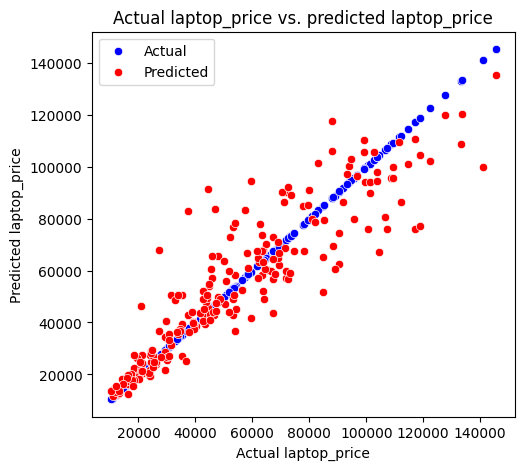

In [ ]:
# plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax1)
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted', ax=ax1)

ax1.set_title("Actual laptop_price vs. predicted laptop_price")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('Predicted laptop_price')

plt.legend()
plt.show()

##We can see in above graph that model is overitted hence we sall use hyperparameters tunning to curb the overfitting.

#Hyper parameter tuning for Random Forest Regressor

In [ ]:
# Hyper parameters range intialization for tuning
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
parameters={'n_estimators': n_estimators,
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           'min_samples_split': min_samples_split,
           "max_features":["auto","sqrt",None]
           }

In [ ]:
RRF = RandomizedSearchCV(rf, param_distributions=parameters, cv=5, n_iter=10,n_jobs=-1)
#cross validation is 5 with n_jobs = -1 ( that is parallel processing

# fit the object
RRF.fit(X_train, y_train)

# Display the best estimator
print(RRF.best_estimator_)

# Display the best score
print(RRF.best_score_)

# Display the best selected parameter by the randomizedSearchCV
print(RRF.best_params_)

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5)
0.8165225175645116
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 12}


In [ ]:
# training the RandomForestRegressor with best parameters determined using randomizedSearchCV
tuned_rf= RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,
                      min_samples_split=10, n_estimators=400)

In [ ]:
tuned_rf.fit(X_train,y_train)  # fitting the model here

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,
                      min_samples_split=10, n_estimators=400)

In [ ]:
# prediction

tuned_rf_pred=tuned_rf.predict(X_test)

In [ ]:
#random forest in it's naive form
rf.score(X_train,y_train)

0.9772268664268677

In [ ]:
rf.score(X_test,y_test) # R^2 value pre tuning

0.8211520437631279

In [ ]:
#R^2 value of training data post tuning

tuned_rf.score(X_train,y_train)

0.7976767498198525

In [ ]:
tuned_rf.score(X_test,y_test)

0.7276873751209807

Text(0, 0.5, 'predicted tuned laptop_price')

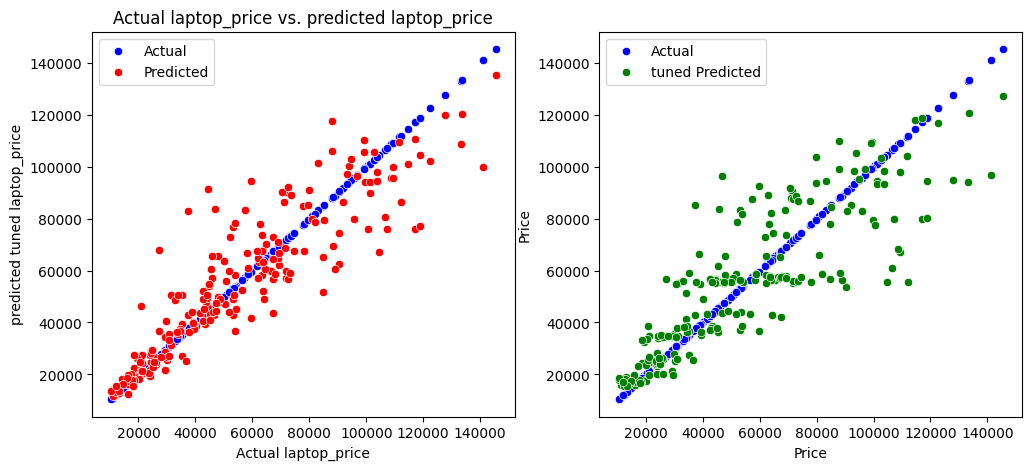

In [ ]:
# plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax1)
# sns.scatterplot(x=y_test, y=tuned_rf_pred, color='orange', label='tuned Predicted', ax=ax1)
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted', ax=ax1)

ax1.set_title("Actual laptop_price vs. predicted laptop_price")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('predicted laptop_price')


ax2 = fig.add_subplot(grid[0, 1])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax2)
sns.scatterplot(x=y_test, y=tuned_rf_pred, color='green', label='tuned Predicted', ax=ax2)
#sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted', ax=ax1)


ax1.set_title("Actual laptop_price vs. predicted laptop_price")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('predicted tuned laptop_price')


In [ ]:
# checking the metrics for RFR
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))


MAE: 8939.129655116461
MSE: 175062947.75455657
RMSE: 13231.135542898674
Adjusted R^2: 0.9769674913292239


In [ ]:
y_test

943     59620.3200
611     46833.6528
225     44328.9600
1288    19660.3200
888     15824.1600
           ...    
953     61751.5200
1027    56476.8000
1211    93186.7200
367     43103.5200
1123    27899.0064
Name: Price, Length: 223, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#y=mx1+mx2+c

#This will give value of m1,m2,m3....values
lr.coef_

array([ 1602.39101649,   687.61312823, -2477.90994801,  3061.32965425,
        7596.22463091, 14508.21201047,  3221.07945931,  4175.37649526,
        5823.68610164,  -908.95918971])

In [ ]:
lr.intercept_

58190.60963419572

In [ ]:
ycap=lr.predict(X_test)

In [ ]:
ycap_train=lr.predict(X_train)

In [ ]:
ycap

array([ 51484.94896078,  88092.02658575,  64858.49136076,  25372.79678137,
        11716.95323016,  94413.49940251,  47080.64058249,  34861.93249151,
        89192.99306719,  86925.5517778 ,  68814.71029848,  55920.81618793,
        65704.33693902,  17717.74643428,  89530.31161339,  48330.05507534,
        79225.39579449,  58248.66246288,  89471.77787044,  59638.32674863,
        22827.60813567,  78101.68780861,  98085.1507228 ,  20860.83272508,
        68999.26560358,  46104.23712991,  62571.2578897 ,  32734.89846953,
        78496.76965611,  76441.28177307,  97825.18052577,  15915.16318233,
        66624.69826853,  64725.61238282,  53245.53182596,  32228.90358585,
        64793.63467344,  95129.40200126,  41195.01348863,  40643.37699477,
        68410.28104828,  27834.81274964,  61351.98935026,  40264.24228213,
        67239.95917639,  59023.49069231,  66374.56216088,  51745.70373034,
        68877.25800415,  31702.21429222,  34535.24881012,  47448.69448708,
        45890.14226973,  

In [ ]:
y_test

943     59620.3200
611     46833.6528
225     44328.9600
1288    19660.3200
888     15824.1600
           ...    
953     61751.5200
1027    56476.8000
1211    93186.7200
367     43103.5200
1123    27899.0064
Name: Price, Length: 223, dtype: float64

In [ ]:
#Perormance of testing
print('MAE:', metrics.mean_absolute_error(y_test, ycap))
print('MSE:', metrics.mean_squared_error(y_test, ycap))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ycap)))


MAE: 14894.565546112155
MSE: 373891422.8956735
RMSE: 19336.272207839687


Text(0, 0.5, 'predicted laptop_price')

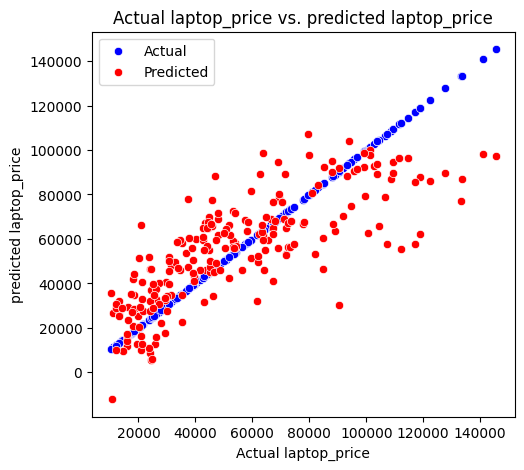

In [ ]:
# plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax1)
sns.scatterplot(x=y_test, y=ycap, color='red', label='Predicted', ax=ax1)

ax1.set_title("Actual laptop_price vs. predicted laptop_price")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('predicted laptop_price')

#Hyper parameter tuning for Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import r2_score

In [ ]:
# Define the hyperparameter distribution
param_dist_ridge = {
    'alpha': uniform(0.01, 100)  # Example range for alpha
}

In [ ]:
ridge = Ridge()

# Perform Randomized Search Cross-Validation for Ridge Regression
randomized_search_ridge = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist_ridge, n_iter=100, cv=5, scoring='neg_mean_squared_error')
randomized_search_ridge.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef8b3b0bd30>},
                   scoring='neg_mean_squared_error')

In [ ]:
y_tunned_linear=randomized_search_ridge.predict(X_test)

In [ ]:
print("-----Performance Prior to hyper parameter tuning---------")
print('MAE:', metrics.mean_absolute_error(y_test, ycap))
print('MSE:', metrics.mean_squared_error(y_test, ycap))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ycap)))

print("-----Performance Post to hyper parameter tuning---------")
print('MAE:', metrics.mean_absolute_error(y_test, y_tunned_linear))
print('MSE:', metrics.mean_squared_error(y_test, y_tunned_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_tunned_linear)))

-----Performance Prior to hyper parameter tuning---------
MAE: 14894.565546112155
MSE: 373891422.8956735
RMSE: 19336.272207839687
-----Performance Post to hyper parameter tuning---------
MAE: 15029.268043337335
MSE: 376692337.5023275
RMSE: 19408.56350950084


Text(0, 0.5, 'predicted laptop_price')

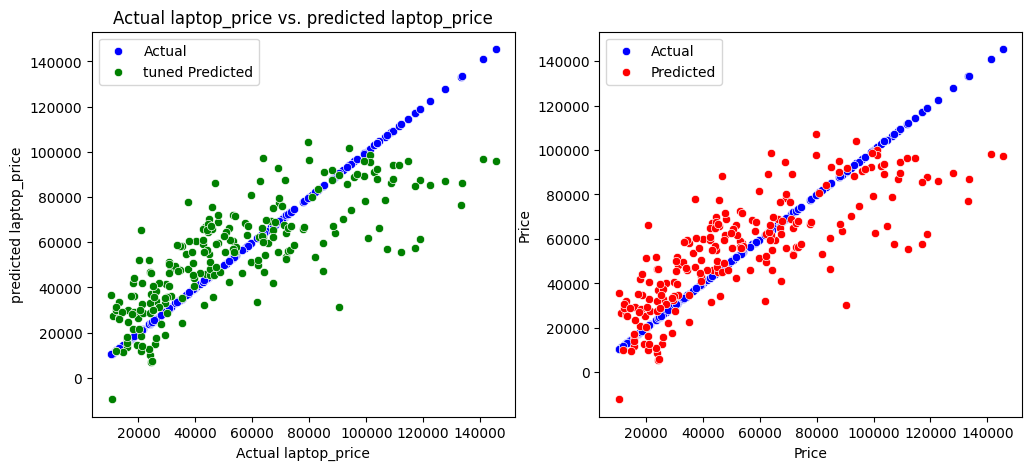

In [ ]:
# plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax1)
sns.scatterplot(x=y_test, y=y_tunned_linear, color='green', label='tuned Predicted', ax=ax1)

ax1.set_title("Actual laptop_price vs. tuned predicted laptop_price")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('predicted laptop_price')

ax2 = fig.add_subplot(grid[0, 1])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax2)
sns.scatterplot(x=y_test, y=ycap, color='red', label='Predicted', ax=ax2)

ax1.set_title("Actual laptop_price vs. predicted laptop_price")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('predicted laptop_price')

#SVR

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [ ]:
pred_svr=svr.predict(X_test)

In [ ]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, pred_svr))
print('MSE:', metrics.mean_squared_error(y_test, pred_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))
print("Adjusted R^2:",(1 - (1-svr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 25568.725021209826
MSE: 979333167.102147
RMSE: 31294.299274822355
Adjusted R^2: -0.03985188136984563


Text(0, 0.5, 'predicted laptop_price')

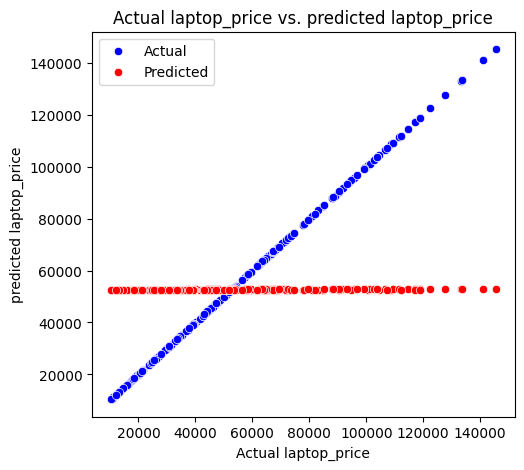

In [ ]:
# plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax1)
sns.scatterplot(x=y_test, y=pred_svr, color='red', label='Predicted', ax=ax1)

ax1.set_title("Actual laptop_price vs. predicted laptop_price")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('predicted laptop_price')

-----Lets Compare all the 3 models----


Text(0, 0.5, 'predicted tuned laptop_price')

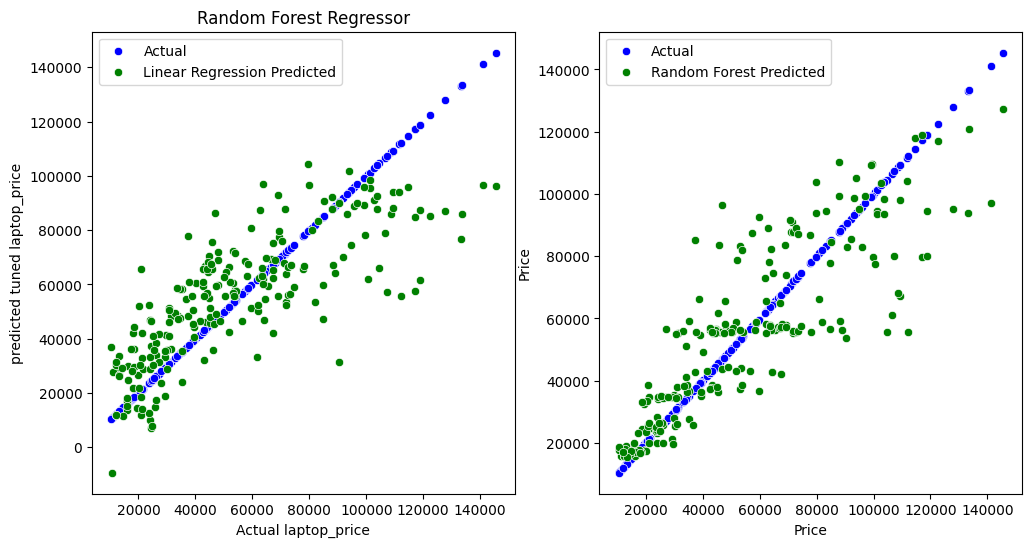

In [ ]:
print("-----Lets Compare all the 3 models----")
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,6))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax1)
sns.scatterplot(x=y_test, y=y_tunned_linear, color='green', label='Linear Regression Predicted', ax=ax1)

ax1.set_title("Linear Regression model")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('predicted laptop_price')

ax2 = fig.add_subplot(grid[0, 1])

sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', ax=ax2)
sns.scatterplot(x=y_test, y=tuned_rf_pred, color='green', label='Random Forest Predicted', ax=ax2)
#sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted', ax=ax1)


ax1.set_title("Random Forest Regressor")
ax1.set_xlabel('Actual laptop_price')
ax1.set_ylabel('predicted tuned laptop_price')


In [ ]:
print("-----Performance of Linear Regression model---------")
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

print("-----Performance of Random forest Regression model---------")
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

-----Performance of Linear Regression model---------
Adjusted R^2: 0.9769674913292239
-----Performance of Random forest Regression model---------
Adjusted R^2: 0.9769674913292239


#Conclusion


1.   We used 2 models Random forest regressor and Linear Regressor, in both the graphs we found that our model is over fitting, so we used hyper-parameter tunning to over come the problem
2.   From both the models we can see that

